In [13]:
from os import getcwd
from ROOT import RDataFrame
import ROOT as rt
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# Parameters
save_date = 'may15'


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

############

rt.gROOT.SetBatch()
cur_dir = getcwd()

data_in_dir = cur_dir + '/../data/processed/'
data_out_dir = cur_dir + '/../data/processed/'
out_dir = cur_dir + f"/reports/weekly/{save_date}/"
ending = ".png"

print(f"Current directory '{cur_dir}'")
print(f"Using output directory '{out_dir}'")

fname_sig = "dt_mb1_jet_muon_mc_ca_0p6.root"#_matched_dt_oot
fname_bkg = "dt_mb1_jet_muon_r3_ca_0p6.root"#_matched_dt_oot

col_names = [
    "nDtRechitClusters", "dtRechitClusterSize", "dtRechitClusterNSegStation1", "dtRechitClusterJetVetoLooseId", "dtRechitClusterJetVetoPt",
    "dtRechitClusterMuonVetoLooseId", "dtRechitClusterMuonVetoPt"
]
data = []

for fname in [fname_sig, fname_bkg]:
    print(f"Processing {fname}")
    yy = 1 if '_mc_' in fname else 0
    data_rt_fmt = RDataFrame('ReducedMuonSystem', data_in_dir + fname).AsNumpy(col_names)
    for i, ndt in enumerate(data_rt_fmt['nDtRechitClusters']):
        for j in range(ndt):
            data.append([
                float(data_rt_fmt["dtRechitClusterSize"][i][j]),
                float(data_rt_fmt["dtRechitClusterNSegStation1"][i][j]),
                float(data_rt_fmt["dtRechitClusterJetVetoLooseId"][i][j]),
                float(data_rt_fmt["dtRechitClusterJetVetoPt"][i][j]),
                float(data_rt_fmt["dtRechitClusterMuonVetoLooseId"][i][j]),
                float(data_rt_fmt["dtRechitClusterMuonVetoPt"][i][j]),
                yy,
            ])

data = np.array(data)  # everything

print('requiring cluster size > 100 and hit in MB1')
# data = data[(data[:,1]>0)][:,1:]
data = data[(data[:,0]>100)&(data[:,1]>0)][:,1:]
# data = data[:,1:]

print(data.shape, np.sum(data[:, -1] == 0), np.sum(data[:, -1] == 1))


Current directory '/home/psimmerl/Documents/CMS/LLP/notebooks'
Using output directory '/home/psimmerl/Documents/CMS/LLP/notebooks/reports/weekly/may15/'
Processing dt_mb1_jet_muon_mc_ca_0p6.root
Processing dt_mb1_jet_muon_r3_ca_0p6.root
requiring cluster size > 100 and hit in MB1
(11349, 6) 3413 7936


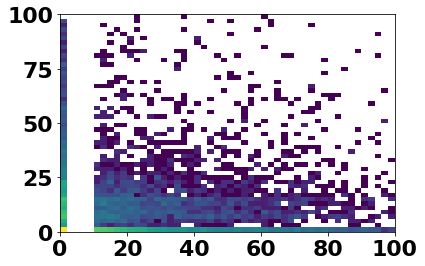

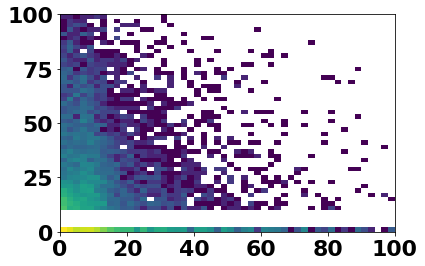

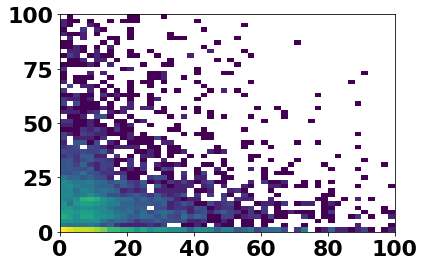

In [14]:
plt.hist2d(data[:, 2], data[:, 4], 50, [[0, 100], [0, 100]], norm=mpl.colors.LogNorm())
plt.show()
plt.hist2d(data[:, 0], data[:, 2], 50, [[0, 100], [0, 100]], norm=mpl.colors.LogNorm())
plt.show()
plt.hist2d(data[:, 0], data[:, 4], 50, [[0, 100], [0, 100]], norm=mpl.colors.LogNorm())
plt.show()

In [15]:

# hasJet  = (data[:,2]>0).reshape(-1)
# hasMuon = (data[:,4]>0).reshape(-1)
# hasJetMuon = (hasJet & hasMuon)
# hasNothing = (hasJet | hasMuon) == 0
# hasOnlyJet, hasOnlyMuon = hasJet & (hasMuon==0), (hasJet==0) & hasMuon
# data_j = data[hasJet][:,[0,2,5]] # has jet
# data_m = data[hasMuon][:,[0,4,5]] # has muon
# data_oj = data[hasOnlyJet][:,[0,2,5]] # has only jet
# data_om = data[hasOnlyMuon][:,[0,4,5]] # has only muon
# data_jm = data[hasJetMuon][:,[0,2,4,5]] # has jet AND muon
# data_no = data[hasNothing][:,[0,5]] # has nothing

# print(f"name    |   total   |    bkg   |   gLLP   ")
# print(f"--------+-----------+----------+----------")
# print(f"data_j  | {len(data_j):>9,} | {np.sum(data_j[:,-1]==0):>9,} | {np.sum(data_j[:,-1]==1):>9,}")
# print(f"data_m  | {len(data_m):>9,} | {np.sum(data_m[:,-1]==0):>9,} | {np.sum(data_m[:,-1]==1):>9,}")
# print(f"data_oj | {len(data_oj):>9,} | {np.sum(data_oj[:,-1]==0):>9,} | {np.sum(data_oj[:,-1]==1):>9,}")
# print(f"data_om | {len(data_om):>9,} | {np.sum(data_om[:,-1]==0):>9,} | {np.sum(data_om[:,-1]==1):>9,}")
# print(f"data_jm | {len(data_jm):>9,} | {np.sum(data_jm[:,-1]==0):>9,} | {np.sum(data_jm[:,-1]==1):>9,}")
# print(f"data_no | {len(data_no):>9,} | {np.sum(data_no[:,-1]==0):>9,} | {np.sum(data_no[:,-1]==1):>9,}")


In [16]:

hasJet  = ((data[:,1]==1) & (data[:,2]>0)).reshape(-1)
hasMuon = ((data[:,3]==1) & (data[:,4]>0)).reshape(-1)
hasJetMuon = (hasJet & hasMuon)
hasNothing = (hasJet | hasMuon) == 0
hasOnlyJet, hasOnlyMuon = hasJet & (hasMuon==0), (hasJet==0) & hasMuon
data_j = data[hasJet][:,[0,2,5]] # has jet
data_m = data[hasMuon][:,[0,4,5]] # has muon
data_oj = data[hasOnlyJet][:,[0,2,5]] # has only jet
data_om = data[hasOnlyMuon][:,[0,4,5]] # has only muon
data_jm = data[hasJetMuon][:,:] # has jet AND muon
data_no = data[hasNothing][:,[0,5]] # has nothing

print(f"name    |   total   |    bkg   |   gLLP   ")
print(f"--------+-----------+----------+----------")
print(f"data_j  | {len(data_j):>9,} | {np.sum(data_j[:,-1]==0):>9,} | {np.sum(data_j[:,-1]==1):>9,}")
print(f"data_m  | {len(data_m):>9,} | {np.sum(data_m[:,-1]==0):>9,} | {np.sum(data_m[:,-1]==1):>9,}")
print(f"data_oj | {len(data_oj):>9,} | {np.sum(data_oj[:,-1]==0):>9,} | {np.sum(data_oj[:,-1]==1):>9,}")
print(f"data_om | {len(data_om):>9,} | {np.sum(data_om[:,-1]==0):>9,} | {np.sum(data_om[:,-1]==1):>9,}")
print(f"data_jm | {len(data_jm):>9,} | {np.sum(data_jm[:,-1]==0):>9,} | {np.sum(data_jm[:,-1]==1):>9,}")
print(f"data_no | {len(data_no):>9,} | {np.sum(data_no[:,-1]==0):>9,} | {np.sum(data_no[:,-1]==1):>9,}")


name    |   total   |    bkg   |   gLLP   
--------+-----------+----------+----------
data_j  |     3,691 |       843 |     2,848
data_m  |       259 |        87 |       172
data_oj |     3,486 |       774 |     2,712
data_om |        54 |        18 |        36
data_jm |       205 |        69 |       136
data_no |     7,604 |     2,552 |     5,052


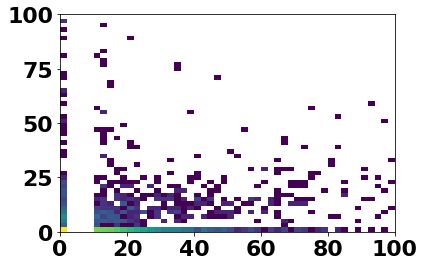

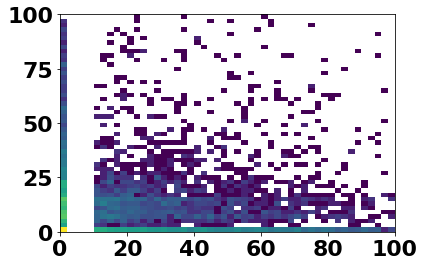

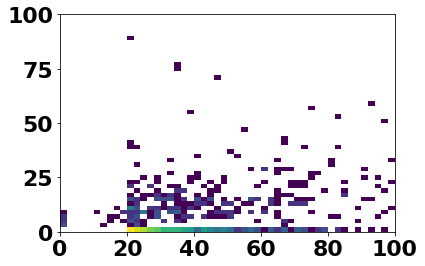

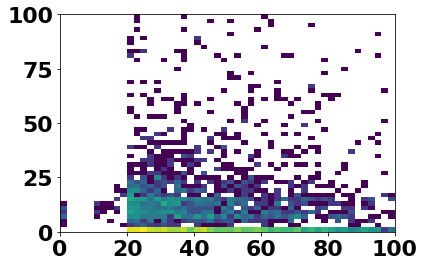

In [17]:
bkg = data[data[:,-1] == 0]
gllP = data[data[:,-1] == 1]
plt.hist2d(bkg[:,2], bkg[:,4], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())
plt.show()
plt.hist2d(gllP[:,2], gllP[:,4], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())
plt.show()

data2 = data[(data[:,1]==1) | (data[:,3]==1)]
bkg = data2[data2[:,-1] == 0]
gllP = data2[data2[:,-1] == 1]
plt.hist2d(bkg[:,2], bkg[:,4], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())
plt.show()
plt.hist2d(gllP[:,2], gllP[:,4], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())
plt.show()



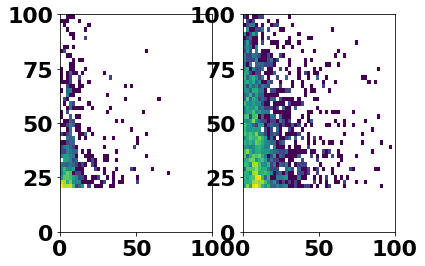

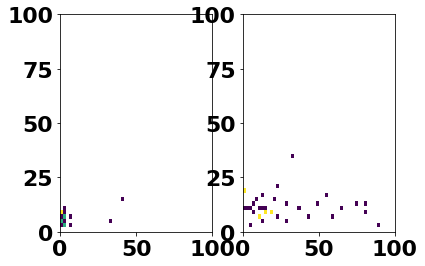

In [18]:
fig1, axs1 = plt.subplots(1,2)#,fig_size=(10,5))

ibkg, isig = data_oj[:,-1]==0, data_oj[:,-1]==1
axs1[0].hist2d(data_oj[ibkg,0], data_oj[ibkg,1], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())
axs1[1].hist2d(data_oj[isig,0], data_oj[isig,1], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())

fig2, axs2 = plt.subplots(1,2)#,fig_size=(10,5))

ibkg, isig = data_om[:,-1]==0, data_om[:,-1]==1
axs2[0].hist2d(data_om[ibkg,0], data_om[ibkg,1], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())
axs2[1].hist2d(data_om[isig,0], data_om[isig,1], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())

print('')

In [19]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


# print('Making sure there is an MB1 hit')
xy = data_oj#[data_oj[:,0]>0,:]


sig, bkg = xy[xy[:,-1]==1], xy[xy[:,-1]==0]
n_samples = min(len(sig), len(bkg))
print(f'resampling s.t. n gLLP = n BKG = {n_samples}')
sig = resample(sig, replace=False, n_samples=n_samples)
bkg = resample(bkg, replace=False, n_samples=n_samples)
xy = np.r_[sig, bkg]

X, y = xy[:,[0,1]],xy[:,-1]

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.5)
print(np.sum(y_trn)/y_trn.shape[0])

sclr = RobustScaler()
X_trn = sclr.fit_transform(X_trn)
X_tst = sclr.transform(X_tst)


# standard - squared_error 
# logistic - log_loss
# linear svm - hinge 
clf = SGDClassifier(loss='squared_error',max_iter=1000000)



resampling s.t. n gLLP = n BKG = 774
0.4883720930232558


In [20]:
clf.fit(X_trn, y_trn)
print(clf.score(X_trn,y_trn), clf.score(X_tst,y_tst))


0.3643410852713178 0.35400516795865633


In [21]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

mpl.rc('font', **font)

0.5122897800776197
-5176158748399.729


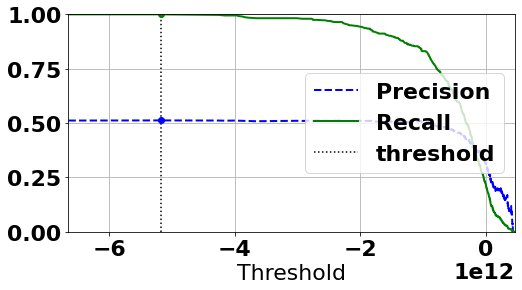

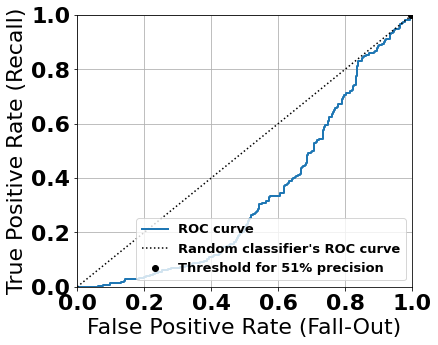

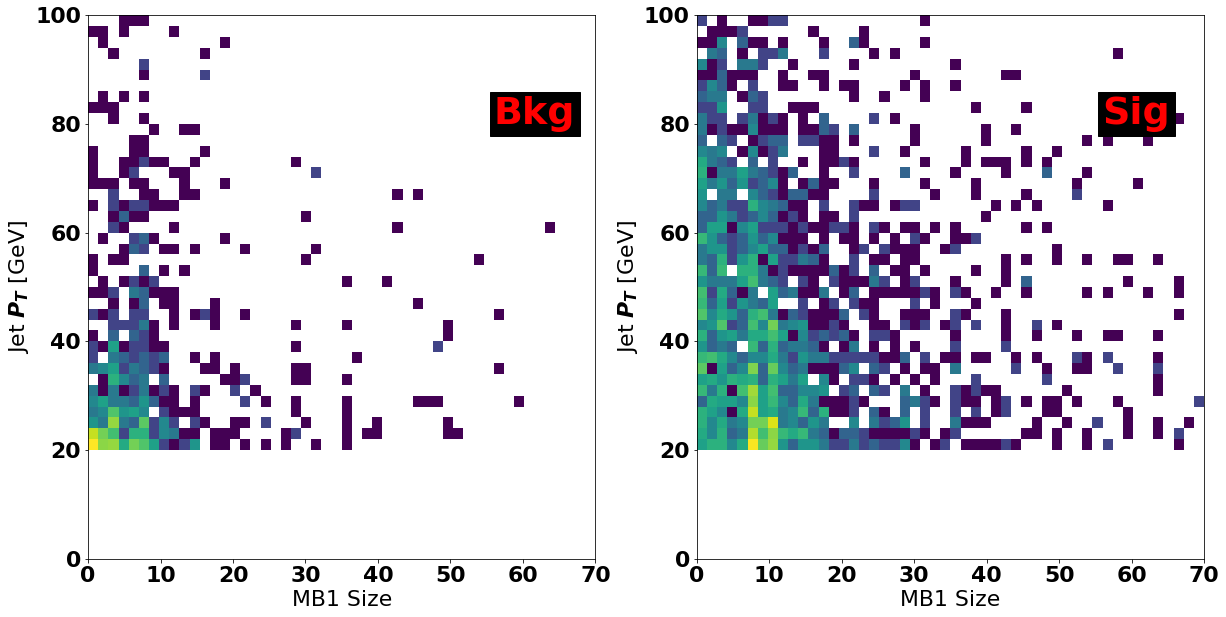

In [22]:

y_tst_scores = clf.decision_function(X_tst)


from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_tst, y_tst_scores)

targ_prec = max(precisions[:int(precisions.size*.9)])
print(targ_prec)
threshold_targ_prec = thresholds[(precisions>=targ_prec).argmax()]
print(threshold_targ_prec)

plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold_targ_prec, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold_targ_prec).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([min(thresholds), max(thresholds), 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_tst, y_tst_scores)
idx_for_threshold_at_targ_prec = (thresholds <= threshold_targ_prec).argmax()
tpr_targ_prec, fpr_targ_prec = tpr[idx_for_threshold_at_targ_prec], fpr[idx_for_threshold_at_targ_prec]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_targ_prec], [tpr_targ_prec], "ko", label=f"Threshold for {targ_prec*100:2.0f}% precision")

# extra code – just beautifies and saves Figure 3–7
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

fig1, axs1 = plt.subplots(1,2,figsize=(20,10))

ibkg, isig = data_oj[:,-1]==0, data_oj[:,-1]==1
lnorm = mpl.colors.LogNorm()
axs1[0].hist2d(data_oj[ibkg,0], data_oj[ibkg,1], 50, [[0,70],[0,100]], norm=lnorm)
axs1[1].hist2d(data_oj[isig,0], data_oj[isig,1], 50, [[0,70],[0,100]], norm=lnorm)


xx, yy = np.meshgrid(np.linspace(0,100,100),np.linspace(0,100,100))
zz = clf.decision_function(sclr.transform(np.c_[xx.reshape(-1,1),yy.reshape(-1,1)])).reshape(xx.shape)

x1 = np.array([np.linspace(0,100,100),np.linspace(0,100,100)]).T
x1=sclr.transform(x1)[:,0]
b, w1, w2 = clf.intercept_, clf.coef_[0][0], clf.coef_[0][1]
y1 = -(b+x1*w1 - threshold_targ_prec)/w2 

x1, y1 = sclr.inverse_transform(np.c_[x1,y1]).T
axs1[1].plot(x1,y1,'--r',lw=2)

for s, ax in zip(['Bkg','Sig'],axs1):
  # ax.contourf(xx,yy,zz, alpha=0.3, levels=100, cmap='seismic_r', antialiased=True)
  ax.plot(x1,y1,'--k',lw=4)
  ax.set_ylabel('Jet $P_{T}$ [GeV]')
  ax.set_xlabel('MB1 Size')
  ax.text(0.8, 0.8, s, size='xx-large', c='r', weight='bold', backgroundcolor='k', transform=ax.transAxes)